In [1]:
import datetime
import os
from mdcrow import MDCrow

In [2]:
prompt25 = "Simulate 1L6X at pH 5.0 and 8.8, then analyze the SASA and RMSF under both pH conditions."
llm_var = "gpt-3.5-turbo-0125"
tools = "all"
agent = MDCrow(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-07
time: 20:08:05
LLM:  gpt-3.5-turbo-0125 
Temperature:  0.1


In [3]:
agent.run(prompt25)

Thought: To simulate the protein 1L6X at different pH conditions and analyze the Solvent Accessible Surface Area (SASA) and Root Mean Square Fluctuation (RMSF) under each pH condition, I will need to set up and run the simulation for both pH values and then calculate the SASA and RMSF.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1L6X",
        "forcefield_files": ["amber14/protein.ff14SB.xml", "amber14/tip3p.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "NoCutoff",
            "constraints": "HBonds",
            "rigidWater": true
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle",
            "Temperature": "300 * kelvin",
            "Friction": "1.0 / picoseconds",
            "Timestep": "0.002 * picoseconds"
        },
        "simulation_params": {
            "Ensemble": "NVT",
            "Number of Steps": 5000,
            "record_interval_steps": 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-07
time: 20:10:48
Files found in registry: 1L6X_200816: PDB file downloaded from RSCB
 PDBFile ID: 1L6X_200816
 1L6X_200823: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_200826: Initial positions for simulation sim0_200826
 sim0_200826: Basic Simulation of Protein 1L6X_200823
 rec0_200827: Simulation trajectory for protein 1L6X_200823 and simulation sim0_200826
 rec1_200827: Simulation state log for protein 1L6X_200823 and simulation sim0_200826
 rec2_200827: Simulation pdb frames for protein 1L6X_200823 and simulation sim0_200826
 sasa_1L6X: Total SASA values for 1L6X
 fig0_201045: Plot of SASA over time for 1L6X
 rmsf_1L6X: RMSF for 1L6X
 fig0_201047: RMSF plot for 1L6X


In [9]:
path_sasa= registry.get_mapped_path("fig0_201045")
path_rmse = registry.get_mapped_path("fig0_201047")
assert os.path.exists(path_sasa), 'Path not found'
assert os.path.exists(path_rmse), 'Path not found'

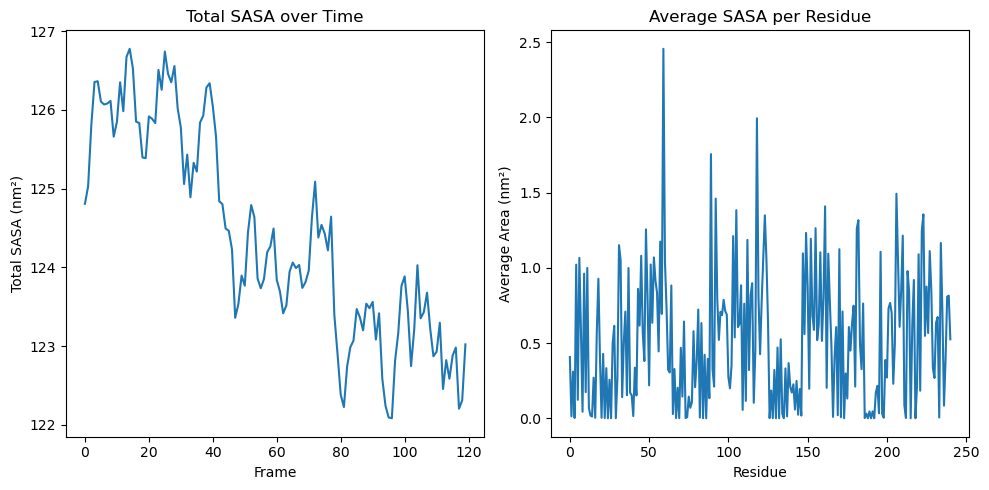

In [10]:
from IPython.display import Image
Image(filename=path_sasa)

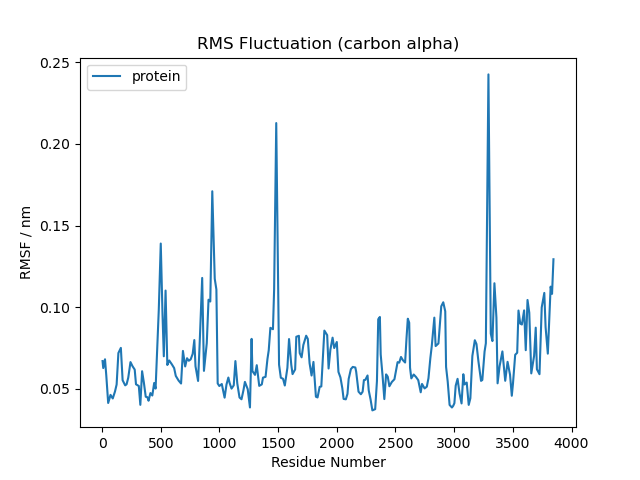

In [11]:
Image(filename=path_rmse)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ❌
### No hallucination ❌
### Logic make sense ✅
### Correct Answer  ❌
### Number of steps completed: 6
### % steps completed: 66.67%